# **Perkenalan Dataset**

Sumber dataset : [Dataset diabetes](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

Variabel-variabel yang dimiliki :
1. Age : Usia pasien dalam tahun

2. Gender : Jenis kelamin pasien

3. Body Mass Index (BMI) : Indeks massa tubuh, dihitung dari berat dan tinggi badan

4. Hypertension : Riwayat tekanan darah tinggi. Dikodekan sebagai 1 (ya) dan 0 (tidak)

5. Heart Disease : Apakah pasien memiliki riwayat penyakit jantung. Dikodekan sebagai 1 (ya) dan 0 (tidak)

6. Smoking History : Riwayat merokok pasien

7. HbA1c Level : Persentase hemoglobin terglikasi, mencerminkan kadar gula darah rata-rata dalam 2–3 bulan terakhir

8. Blood Glucose Level : Kadar gula darah saat ini (mg/dL)

9. Diabetes : Status diabetes. Dikodekan sebagai 1 (positif diabetes) dan 0 (negatif diabetes)

# **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# **Load Data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/silviaazahro/Capstone-Project/refs/heads/main/diabetes_prediction_dataset%20(1).csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Exploratory Data Analysis**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Insight:** Menampilkan informasi tipe data di setiap kolom, terdapat 2 tipe data numerik dan kategorik

In [ ]:
# Menampilkan statistik deskriptif dari dataset
data.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


**Insight:** Berdasarkan tabel statistik deskriptif, dataset terdiri dari 100.000 data dengan fitur-fitur seperti usia, jenis kelamin, riwayat hipertensi, penyakit jantung, kebiasaan merokok, BMI, kadar HbA1c, kadar glukosa darah, dan status diabetes. Rata-rata usia pasien adalah 41,88 tahun dengan mayoritas berjenis kelamin perempuan (58,5%). Proporsi pasien dengan hipertensi dan penyakit jantung cukup kecil (masing-masing 7,5% dan 3,9%), sementara BMI rata-rata berada pada angka 27,3 yang termasuk kategori overweight. Kadar HbA1c rata-rata adalah 5,5 dan kadar glukosa darah 138 mg/dL, yang mendekati ambang prediabetes. Hanya sekitar 8,5% dari seluruh data yang menunjukkan status positif diabetes, menandakan bahwa dataset ini memiliki ketidakseimbangan kelas yang perlu diperhatikan dalam proses modeling.

## **Distribusi Fitur Numerik**

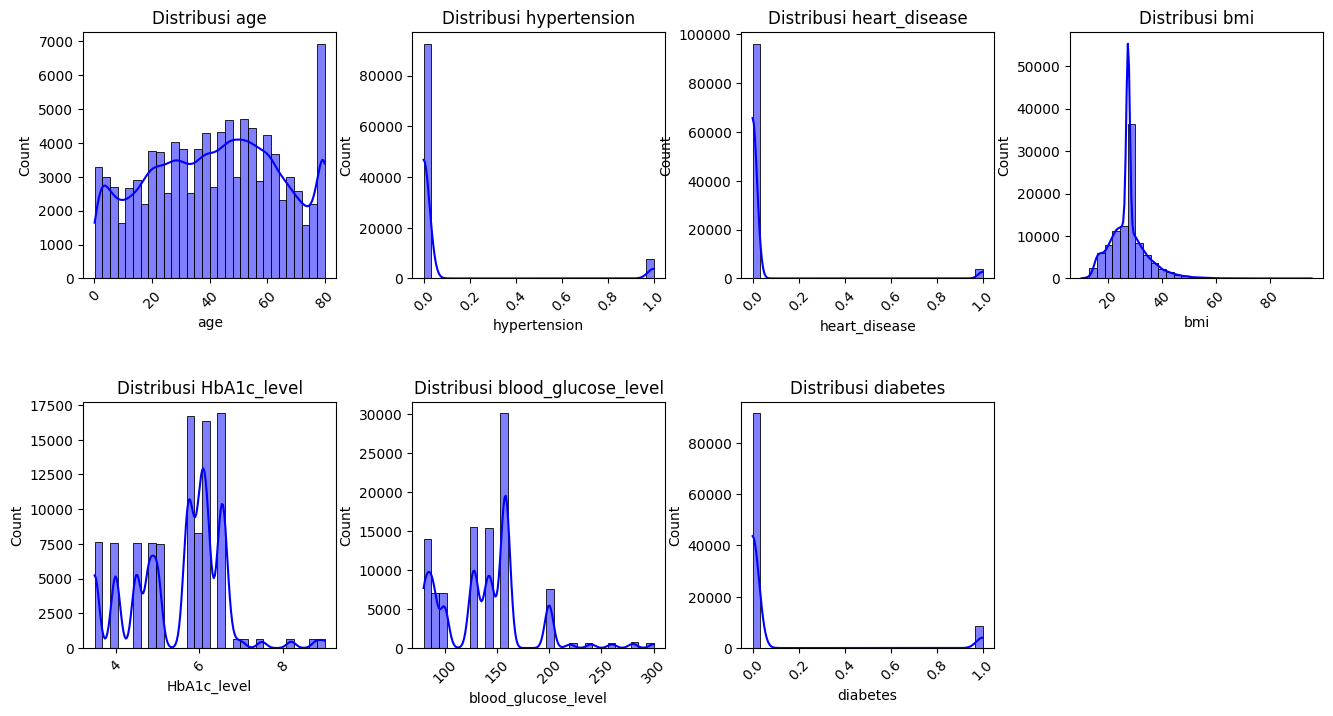

In [ ]:
# Pilih fitur numerik
num_features = data.select_dtypes(include=[np.number])

# Hitung jumlah fitur dan tentukan ukuran grid yang optimal
num_plots = len(num_features.columns)
cols = 4  # Maksimal 4 kolom
rows = int(np.ceil(num_plots / cols))  # Hitung jumlah baris otomatis

# Buat subplot grid dengan ukuran dinamis
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))

# Loop untuk plotting setiap fitur
for i, column in enumerate(num_features.columns):
    r, c = divmod(i, cols)  # Hitung posisi baris & kolom
    sns.histplot(data[column], bins=30, kde=True, color='blue', ax=axes[r, c])
    axes[r, c].set_title(f'Distribusi {column}')
    axes[r, c].tick_params(axis='x', rotation=45)  # Rotasi label untuk keterbacaan

# Hapus subplot kosong jika jumlah fitur tidak pas dengan grid
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

# Tambah jarak antar subplot untuk visibilitas
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

**Insight:** Visualisasi menunjukkan bahwa sebagian besar pasien berusia antara 40–60 tahun. Mayoritas tidak memiliki hipertensi, penyakit jantung, atau diabetes, yang tampak dari distribusi sangat timpang ke arah nol. Nilai BMI terdistribusi normal dengan puncak pada kisaran overweight. HbA1c dan kadar glukosa darah cenderung terkonsentrasi di nilai normal hingga prediabetes, dengan beberapa outlier ekstrem. Secara keseluruhan, dataset cenderung tidak seimbang terhadap kondisi kesehatan kronis.

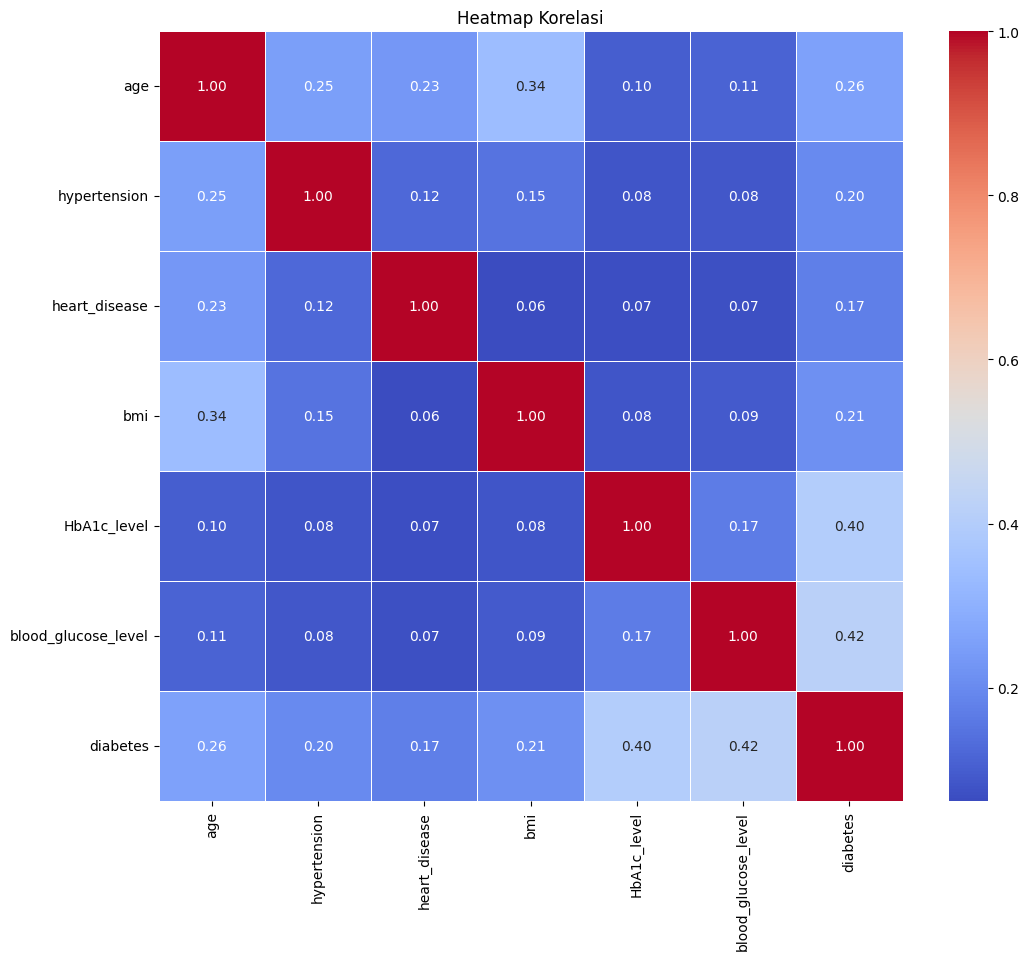

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

**Insight:** Heatmap menunjukkan bahwa diabetes memiliki korelasi tertinggi dengan kadar glukosa darah (0.42) dan HbA1c (0.40), yang sesuai dengan indikator medis diabetes. Korelasi antar variabel lainnya relatif lemah, meskipun usia memiliki hubungan sedang dengan hipertensi (0.25) dan diabetes (0.26), yang mencerminkan peningkatan risiko penyakit kronis seiring bertambahnya usia.

## **Binning**

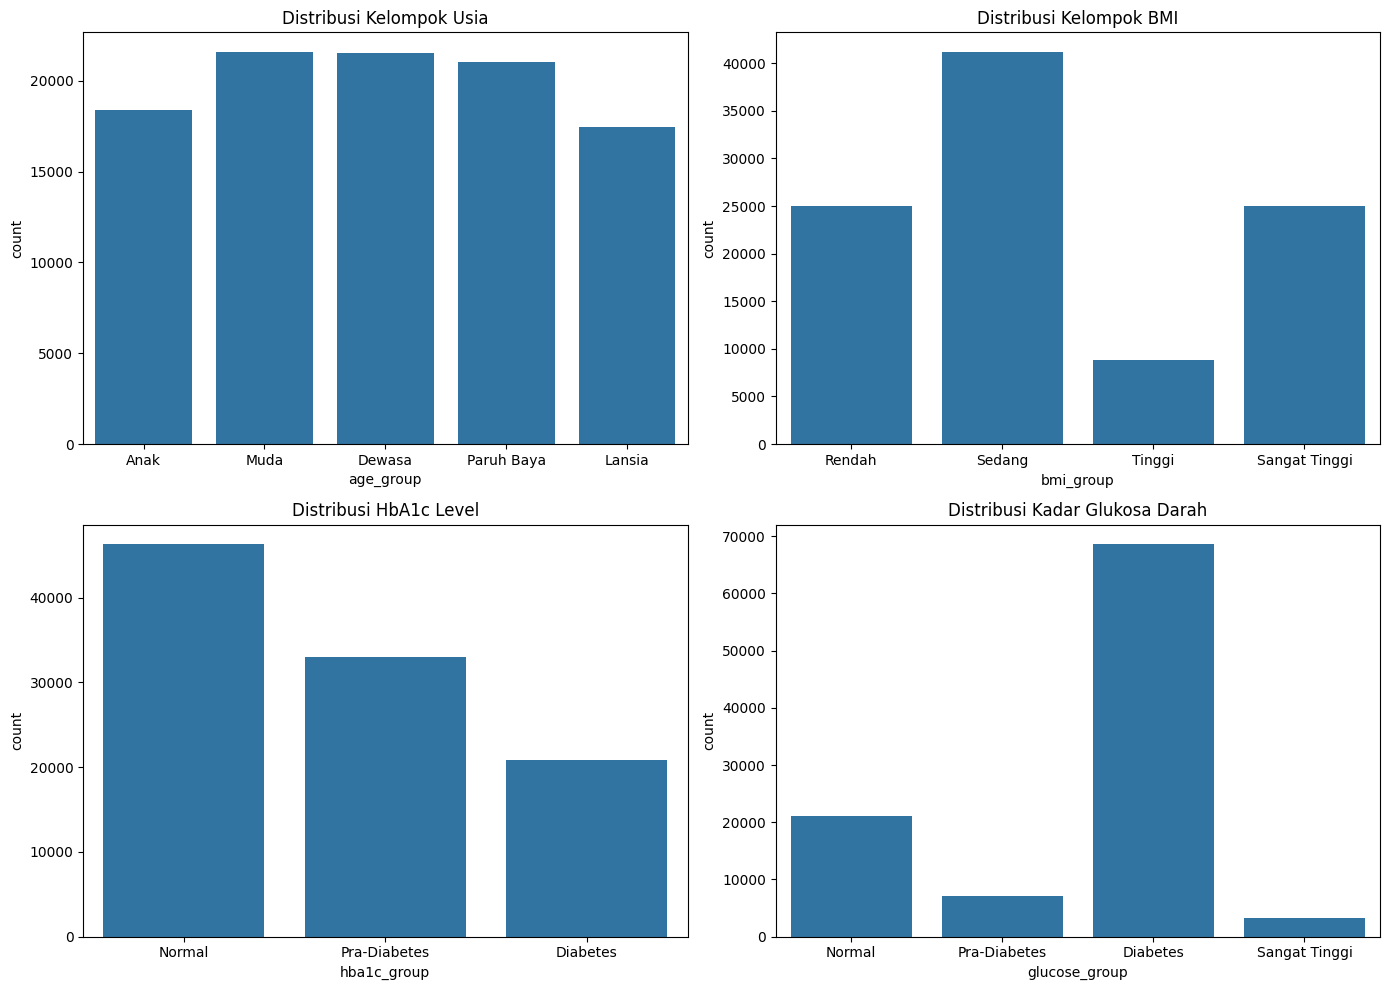

In [ ]:
# Binning age
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['Anak', 'Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])

# Binning bmi dengan kuantil
data['bmi_group'] = pd.qcut(data['bmi'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Binning HbA1c_level
data['hba1c_group'] = pd.cut(data['HbA1c_level'], bins=[0, 5.7, 6.4, 10], labels=['Normal', 'Pra-Diabetes', 'Diabetes'])

# Binning blood_glucose_level
data['glucose_group'] = pd.cut(data['blood_glucose_level'], bins=[0, 99, 125, 200, 500], labels=['Normal', 'Pra-Diabetes', 'Diabetes', 'Sangat Tinggi'])

# Visualisasi distribusi hasil binning
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=data, x='age_group', ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Kelompok Usia')

sns.countplot(data=data, x='bmi_group', ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Kelompok BMI')

sns.countplot(data=data, x='hba1c_group', ax=axs[1, 0])
axs[1, 0].set_title('Distribusi HbA1c Level')

sns.countplot(data=data, x='glucose_group', ax=axs[1, 1])
axs[1, 1].set_title('Distribusi Kadar Glukosa Darah')

plt.tight_layout()
plt.show()

**Insight:** Grafik menunjukkan bahwa kelompok usia paling banyak berasal dari kategori muda hingga paruh baya. Sebagian besar individu memiliki BMI sedang, dengan jumlah yang relatif seimbang antara kategori rendah dan sangat tinggi. Untuk HbA1c, mayoritas berada pada level normal, disusul oleh pra-diabetes dan diabetes. Namun, distribusi kadar glukosa darah menunjukkan dominasi kelompok diabetes, yang mengindikasikan prevalensi diabetes tinggi meski HbA1c cenderung normal.

# **Data Preprocessing**

In [ ]:
# Deteksi Data Duplikat
print("Jumlah duplikasi awal: ", data.duplicated().sum())

# Menghapus Data Duplikat
data.drop_duplicates(inplace=True)

# Periksa Kembali Data Duplikat
print("Jumlah duplikasi setelah penanganan: ", data.duplicated().sum())

Jumlah duplikasi awal:  3854
Jumlah duplikasi setelah penanganan:  0


**Insight**: Terdapat 3854 data duplikat, maka dilakukan penanganan dengan menghapus data duplikat tersebut

In [ ]:
# Deteksi missing value
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0
age_group,0


**Insight**: Tidak terdapat missing value pada dataset

## **Outlier**

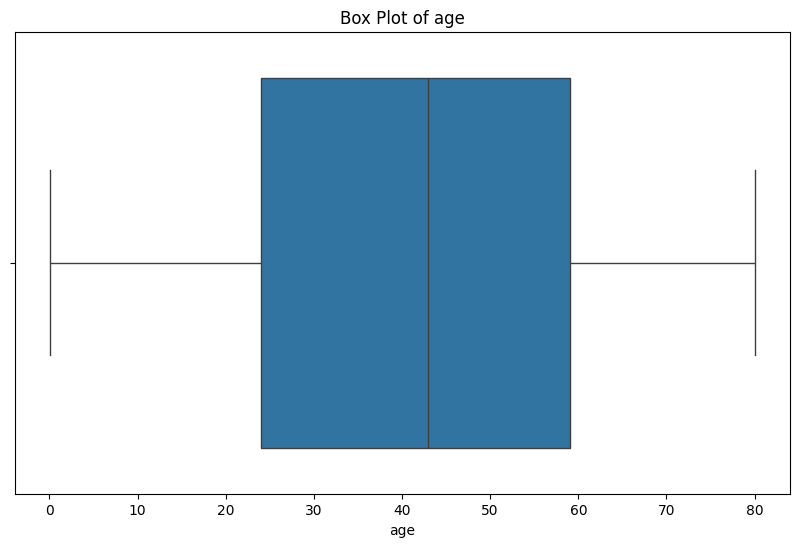

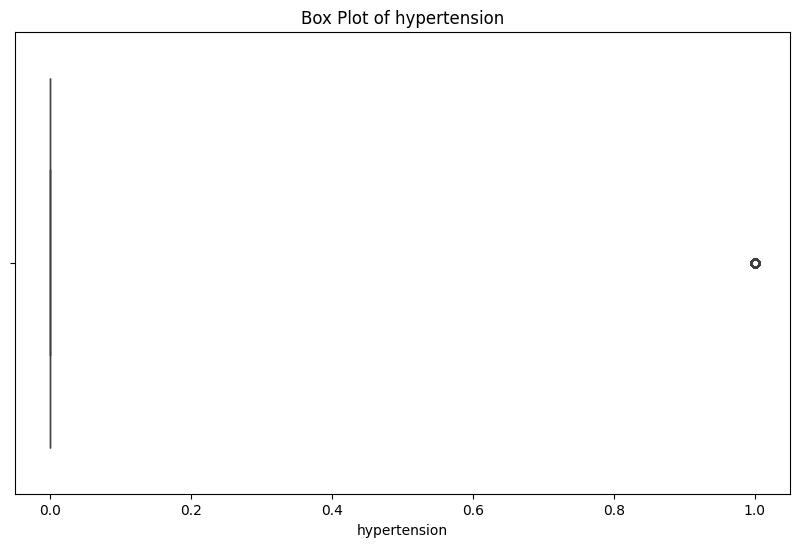

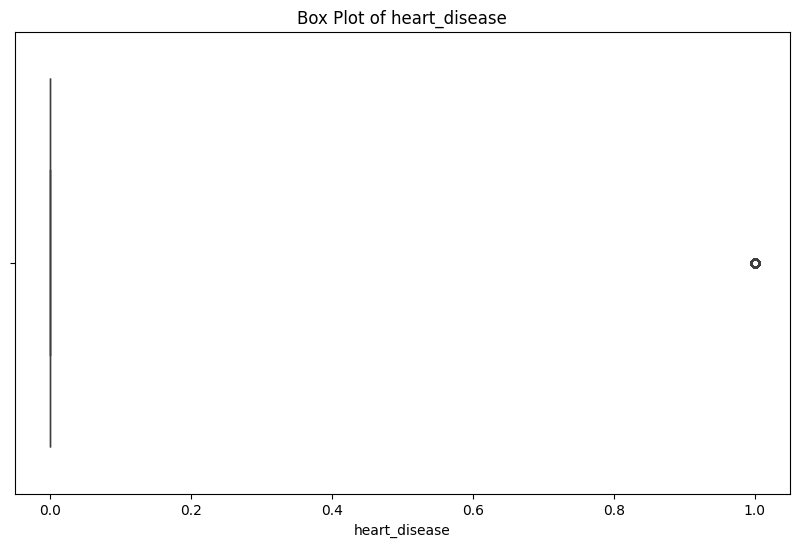

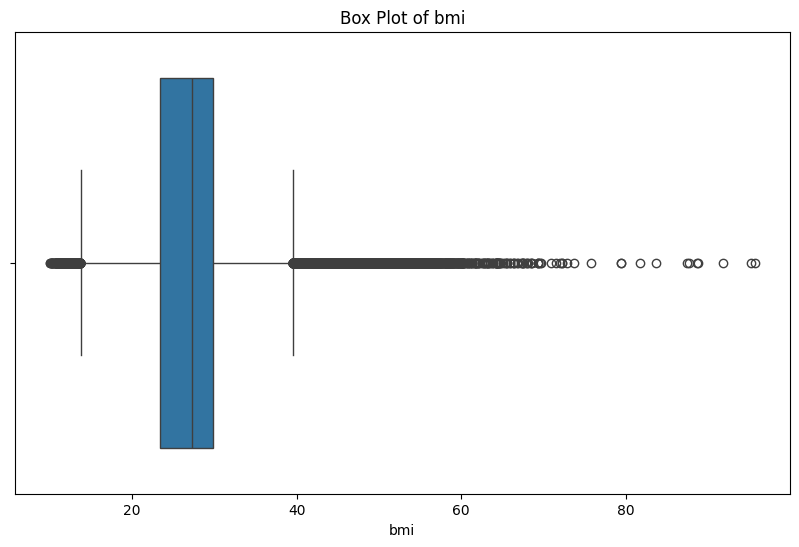

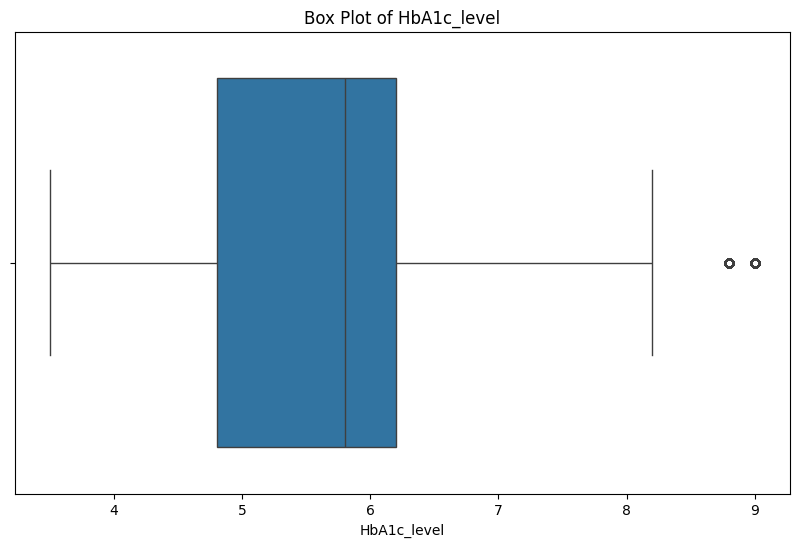

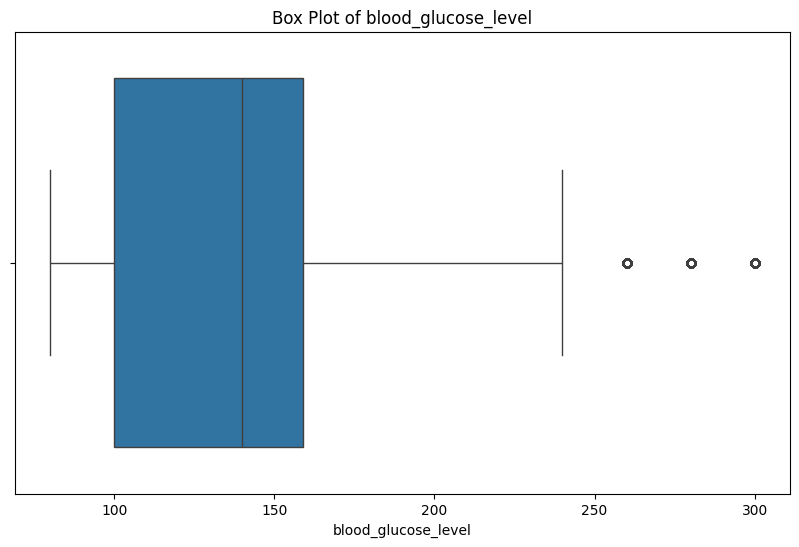

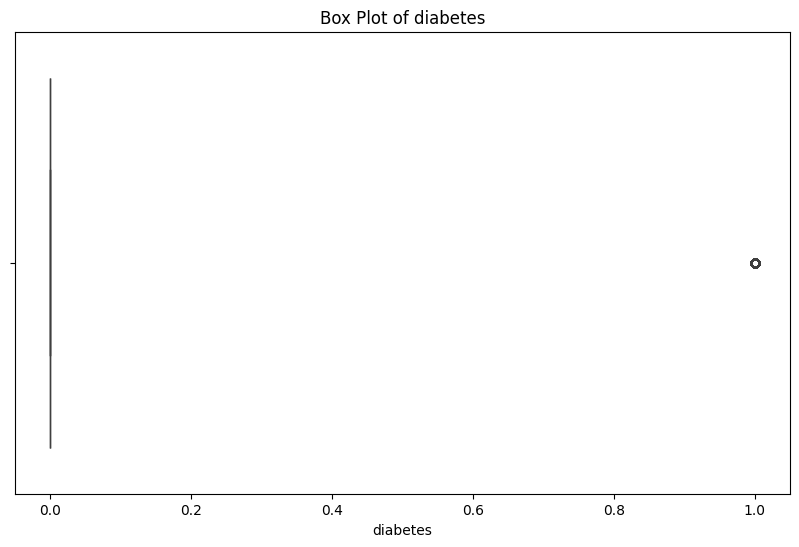

In [ ]:
# Boxplot
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insight**: Terdapat outlier pada fitur hypertension, heart_disease, bmi, HbA1c_level, glucose_level, dan diabetes. Pada fitur bmi, outlier terlihat cukup banyak sehingga perlu dilakukan penanganan

In [ ]:
# Memisahkan berdasarkan kelas target
data_majority = data[data['diabetes'] == 0]
data_minority = data[data['diabetes'] == 1]

# Outlier removal HANYA untuk majority class
num_cols = data.select_dtypes(include='number').columns.drop('diabetes')

Q1 = data_majority[num_cols].quantile(0.25)
Q3 = data_majority[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter baris yang tidak outlier
mask = ~((data_majority[num_cols] < (Q1 - 1.5 * IQR)) |
         (data_majority[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

data_majority_clean = data_majority[mask]

# Gabungkan kembali dengan minority
data_cleaned = pd.concat([data_majority_clean, data_minority], ignore_index=True)

print("\nDistribusi setelah cleaning:")
print(data_cleaned['diabetes'].value_counts())


Distribusi setelah cleaning:
diabetes
0    75898
1     8482
Name: count, dtype: int64


**Insight**:

# **Split Data**

In [ ]:
# Split
X = data_cleaned.drop('diabetes', axis=1)
y = data_cleaned['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Insight:** Data dibagi dengan persentase umum yang digunakan yaitu data training 80% dan data testing 20%.

# **Transformasi Data**

Langkah selanjutnya merupakan tahap *preprocessing* data sebelum pelatihan model machine learning dilakukan. Pada tahap ini, fitur numerik seperti usia, indeks massa tubuh, kadar HbA1c, dan kadar glukosa darah distandarisasi agar berada pada skala yang sama menggunakan teknik standardisasi. Sementara itu, fitur kategorik seperti jenis kelamin dan riwayat merokok dikodekan ke dalam bentuk numerik menggunakan *One-Hot Encoding*. Setelah semua fitur ditransformasikan, data latih kemudian diseimbangkan menggunakan metode SMOTE (*Synthetic Minority Over-sampling Technique*) untuk mengatasi ketidakseimbangan kelas, dengan cara menghasilkan data sintetis pada kelas minoritas. Dengan langkah ini, data menjadi lebih siap dan seimbang untuk digunakan dalam pelatihan model machine learning secara optimal.


In [ ]:
# Mendefinisikan fitur numerik dan kategorik
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'smoking_history']

# Standardisasi untuk fitur numerik
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-Hot Encoding untuk fitur kategorik
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, categorical_features)
])

# Transformasi data train dan test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# **Modelling**

In [ ]:
# Callback EarlyStopping untuk menghindari overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Tentukan input_dim dari data hasil SMOTE
input_dim = X_train_resampled.shape[1]

**Insight**: Menggunakan callback Early Stopping untuk mencegah overfitting

In [ ]:
# Arsitektur model
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

**Insight**: Membangun arsitektur model, dengan fungsi aktivasi relu dan sigmoid

In [ ]:
# Kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Insight**: Mengkonfigurasi model sebelum proses training, dengan algoritma optimasi Adam, fungsi loss binary_crossentropy karena target (diabetes) hanya memiliki dua kelas (0 dan 1), dan metrik evaluasi akurasi

In [ ]:
# Training model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8555 - loss: 0.3425 - val_accuracy: 0.8376 - val_loss: 0.3366
Epoch 2/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9036 - loss: 0.2267 - val_accuracy: 0.8694 - val_loss: 0.2802
Epoch 3/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9063 - loss: 0.2145 - val_accuracy: 0.8763 - val_loss: 0.2629
Epoch 4/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9107 - loss: 0.2094 - val_accuracy: 0.8683 - val_loss: 0.2614
Epoch 5/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9127 - loss: 0.2010 - val_accuracy: 0.8907 - val_loss: 0.2399
Epoch 6/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9151 - loss: 0.1963 - val_accuracy: 0.8636 - val_loss: 0.2632
Epoch 7/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9184 - loss: 0.1893 - val_accuracy: 0.8640 - val_loss: 0.2515
Epoch 8/50
3036/3036 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9196 - loss: 0

**Insight**: Pelatihan model dilakukan, dan pada epoch 10 dihentikan dengan early stopping karena tidak ada perubahan signifikan pada val_loss

# **Evaluasi**

In [ ]:
# Prediksi data test
y_pred_prob = model.predict(X_test_transformed)  # hasil probabilitas
y_pred = (y_pred_prob > 0.5).astype(int)  # konversi ke kelas 0/1

# Evaluasi metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Akurasi      : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Akurasi      : 0.9291
Precision    : 0.5980
Recall       : 0.8998
F1 Score     : 0.7185
ROC AUC Score: 0.9803


**Insight**:
Hasil evaluasi menunjukkan model bekerja dengan baik dengan akurasi 92,91%, recall tinggi sebesar 89,98%, serta ROC AUC mencapai 98,83% yang menandakan kemampuan sangat baik dalam membedakan kelas. Nilai precision dan F1-score menunjukkan model mampu melakukan deteksi positif secara efektif, sehingga secara keseluruhan model cukup andal untuk digunakan dalam proses klasifikasi.

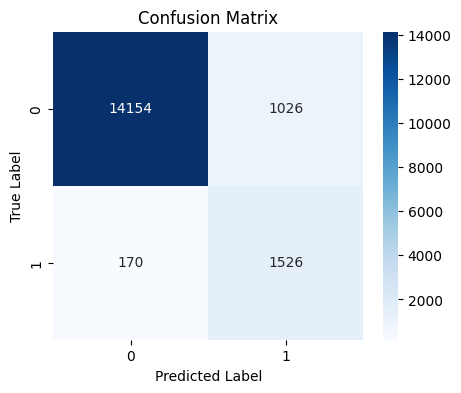

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Insight:**
Confusion matrix menunjukkan model berhasil mengklasifikasikan 14.154 data negatif (true negative) dan 1.526 data positif (true positive) dengan kesalahan berupa 1.026 false positive dan 170 false negative. Secara umum, model memiliki akurasi tinggi dalam mendeteksi kedua kelas, dengan kesalahan yang relatif kecil terutama pada kelas positif, sehingga performanya baik untuk aplikasi klasifikasi.

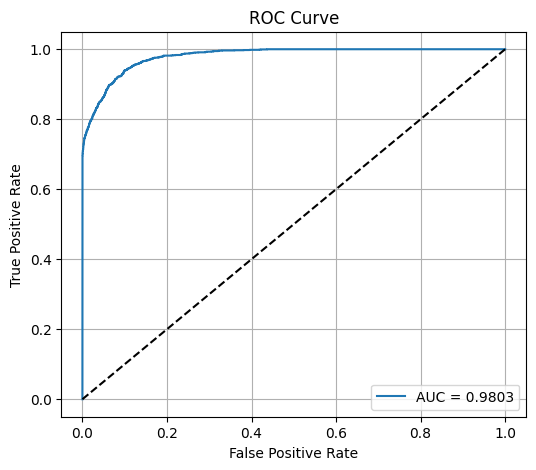

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Insight:** Kurva ROC menunjukkan kinerja model klasifikasi dengan AUC sebesar 0.9803, yang menandakan kemampuan model sangat baik dalam membedakan kelas positif dan negatif. Kurva yang mendekati sudut kiri atas menunjukkan model memiliki true positive rate tinggi dan false positive rate rendah. Dengan performa ini, threshold dapat disesuaikan sesuai kebutuhan tanpa banyak mengorbankan akurasi, sehingga model efektif digunakan dalam berbagai kasus seperti kesehatan atau deteksi fraud.

# **Ekspor Model**

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
model.save("model_diabetes.h5")
!tensorflowjs_converter \
  --input_format=keras \
  --output_format=tfjs_layers_model \
  model_diabetes.h5 \
  tfjs_model

2025-06-11 07:07:11.782966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749625631.811697    1978 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749625631.819874    1978 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


# **API Endpoint**

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np

app = Flask(__name__)
model = load_model("model_diabetes.h5")

@app.route("/", methods=["GET"])
def home():
    return "API is running! Use POST /predict to get predictions."

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        input_data = np.array(data["input"]).reshape(1, -1)
        prediction = model.predict(input_data)
        result = prediction.tolist()
        return jsonify({"prediction": result})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


**Insight:**

API ini dirancang untuk **melakukan prediksi menggunakan model deep learning** format `.h5` yang telah dilatih sebelumnya. Fungsinya adalah menerima input numerik, menjalankan model, dan mengembalikan hasil prediksi dalam format JSON.

---

###  **Penjelasan Komponen Utama**

1. **`Flask` digunakan sebagai web framework**  
   Flask memungkinkan pembuatan REST API ringan yang dapat diakses via HTTP.

2. **`load_model("model_diabetes.h5")`**  
   Model klasifikasi yang sudah dilatih sebelumnya dimuat dan siap digunakan untuk inferensi.

3. **Endpoint `/` (GET)**  
   - Mengembalikan teks sederhana: `"API is running!..."`.
   - Digunakan untuk mengecek status aktif API.

4. **Endpoint `/predict` (POST)**  
   - Endpoint utama untuk menerima data input dan melakukan prediksi.  
   - Menerima input berupa JSON, contoh:
     ```json
     {
       "input": [45, 25.3, 6.8, 140, 1, 0]
     }
     ```
   - Data diubah ke NumPy array dan di-*reshape* ke bentuk yang sesuai model.
   - Model memproses input dan mengembalikan hasil prediksi dalam format JSON.

5. **Error Handling**  
   Jika terjadi kesalahan (seperti format input salah), API akan merespons dengan pesan error dan status HTTP 400.

